## Dominant Color Extraction

Segmentation partitions an image into regions having similar visual appearances to parts of object
We will try to extract K-Dominant Colors by using K-Means


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

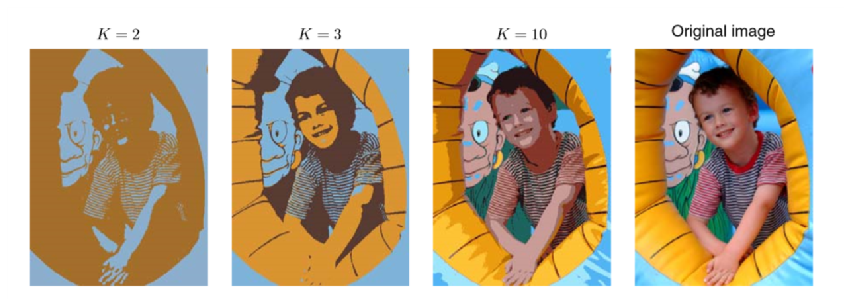

In [6]:
im=cv2.imread("example.png")
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(im)
plt.show()

(330, 500, 3)


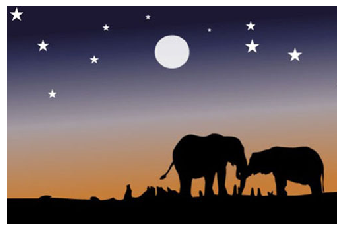

In [9]:
img=cv2.imread("elephant.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

print(img.shape)

plt.imshow(img)
plt.axis("off")
plt.show()

In [12]:
new_img=img.reshape((img.shape[0]*img.shape[1],img.shape[2]))
new_img.shape

(165000, 3)

In [43]:
from sklearn.cluster import KMeans

dominant_colors=7

km=KMeans(n_clusters=dominant_colors)
km.fit(new_img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
km.cluster_centers_

array([[189.1065174 , 132.21252381,  82.70785525],
       [ 33.91777017,  30.79855952,  59.10254506],
       [164.98682573, 147.45544554, 145.28358492],
       [114.9129192 , 110.05543362, 130.15946098],
       [ 72.11026091,  70.56395133,  99.96689516],
       [  1.41688432,   0.79026641,   1.11959487],
       [232.86215913, 232.55472544, 236.82405678]])

In [45]:
centers=np.array(km.cluster_centers_,dtype="uint8")
centers

array([[189, 132,  82],
       [ 33,  30,  59],
       [164, 147, 145],
       [114, 110, 130],
       [ 72,  70,  99],
       [  1,   0,   1],
       [232, 232, 236]], dtype=uint8)

## Plot the colors

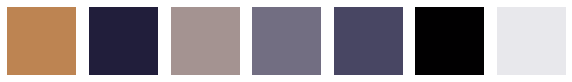

In [54]:
i=1

colors=[]

plt.figure(figsize=(10,10))

for ech_cl in centers:
    plt.subplot(1,dominant_colors,i)
    i+=1
    
    colors.append(ech_cl)
    
    #Color Switch
    a=np.zeros((100,100,3),dtype="uint8")
    a[:,:,:]=ech_cl
    
    plt.imshow(a)
    plt.axis("off")

plt.show()    

## Segmenting our original image

In [55]:
seg_img=np.zeros((330*500,3),dtype="uint8")

print(seg_img.shape)

(165000, 3)


In [56]:
colors

[array([189, 132,  82], dtype=uint8),
 array([33, 30, 59], dtype=uint8),
 array([164, 147, 145], dtype=uint8),
 array([114, 110, 130], dtype=uint8),
 array([72, 70, 99], dtype=uint8),
 array([1, 0, 1], dtype=uint8),
 array([232, 232, 236], dtype=uint8)]

In [57]:
km.labels_

array([1, 1, 1, ..., 5, 5, 5])

In [58]:
for ix in range(seg_img.shape[0]):
    seg_img[ix]=colors[km.labels_[ix]]

In [59]:
seg_img=seg_img.reshape((330,500,3))
seg_img.shape

(330, 500, 3)

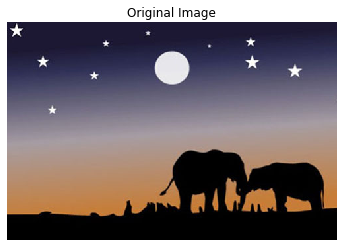

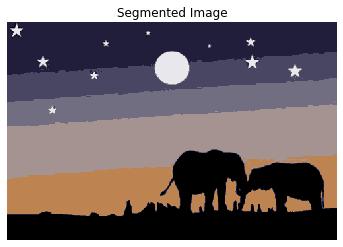

In [60]:
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

plt.imshow(seg_img)
plt.title("Segmented Image")
plt.axis("off")
plt.show()